In [96]:
import sys
from pathlib import Path
from datetime import datetime

sys.path.append(str(Path("..").resolve()))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

from src.config import DATA_DIR, PROCESSED_DIR


# Data Loading

In [97]:
RAW_PATH = Path(DATA_DIR)
PROCESSED_PATH = Path(PROCESSED_DIR)

RAW_PATH, PROCESSED_PATH


(WindowsPath('../data/raw'), WindowsPath('../data/processed'))

In [98]:
file_path = RAW_PATH / "processed.cleveland.data"

columns = ["age", "sex", "cp", "trestbps", "chol","fbs", "restecg", "thalach", "exang","oldpeak", "slope", "ca", "thal", "target"]

df = pd.read_csv(file_path, header=None, names=columns)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Data Cleaning and EDA

In [99]:
df.shape

(303, 14)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [101]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [102]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [103]:
non_numeric_summary = {}

for col in df.columns:
    # Attempt numeric conversion
    coerced = pd.to_numeric(df[col], errors='coerce')
    if coerced.isna().sum() > df[col].isna().sum():
        non_numeric_values = df.loc[coerced.isna(), col].unique()
        non_numeric_summary[col] = non_numeric_values

# Display results
if non_numeric_summary:
    print("Non-numeric values detected:")
    for col, values in non_numeric_summary.items():
        print(f"{col}: {values}")
else:
    print("All columns contain only numeric values.")

Non-numeric values detected:
ca: ['?']
thal: ['?']


In [104]:
(df == "?").sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [105]:
df.replace("?", np.nan, inplace=True)

df = df.apply(pd.to_numeric)
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [106]:
df["ca"].fillna(df["ca"].median(), inplace=True)
df["thal"].fillna(df["thal"].mode()[0], inplace=True)

df.isna().sum()

C:\Users\SAISHASHANK\AppData\Local\Temp\ipykernel_16956\2317862512.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ca"].fillna(df["ca"].median(), inplace=True)
C:\Users\SAISHASHANK\AppData\Local\Temp\ipykernel_16956\2317862512.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [107]:
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)
df["target"].value_counts()

target
0    164
1    139
Name: count, dtype: int64

In [108]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [109]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().sort_index())



Column: age
age
29.0     1
34.0     2
35.0     4
37.0     2
38.0     2
39.0     4
40.0     3
41.0    10
42.0     8
43.0     8
44.0    11
45.0     8
46.0     7
47.0     5
48.0     7
49.0     5
50.0     7
51.0    12
52.0    13
53.0     8
54.0    16
55.0     8
56.0    11
57.0    17
58.0    19
59.0    14
60.0    12
61.0     8
62.0    11
63.0     9
64.0    10
65.0     8
66.0     7
67.0     9
68.0     4
69.0     3
70.0     4
71.0     3
74.0     1
76.0     1
77.0     1
Name: count, dtype: int64

Column: sex
sex
0.0     97
1.0    206
Name: count, dtype: int64

Column: cp
cp
1.0     23
2.0     50
3.0     86
4.0    144
Name: count, dtype: int64

Column: trestbps
trestbps
94.0      2
100.0     4
101.0     1
102.0     2
104.0     1
105.0     3
106.0     1
108.0     6
110.0    19
112.0     9
114.0     1
115.0     3
117.0     1
118.0     7
120.0    37
122.0     4
123.0     1
124.0     6
125.0    11
126.0     3
128.0    12
129.0     1
130.0    36
132.0     8
134.0     5
135.0     6
136.0     3
138.0

In [110]:
# Apply one-hot encoding
df = pd.get_dummies(df, columns=["cp", "restecg", "thal"], drop_first=True)

In [111]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'target', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_1.0',
       'restecg_2.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

In [112]:
# Move target column to the end
cols = [col for col in df.columns if col != "target"] + ["target"]
df = df[cols]

# Verify
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_1.0',
       'restecg_2.0', 'thal_6.0', 'thal_7.0', 'target'],
      dtype='object')

In [113]:
df.dtypes

age            float64
sex            float64
trestbps       float64
chol           float64
fbs            float64
thalach        float64
exang          float64
oldpeak        float64
slope          float64
ca             float64
cp_2.0            bool
cp_3.0            bool
cp_4.0            bool
restecg_1.0       bool
restecg_2.0       bool
thal_6.0          bool
thal_7.0          bool
target           int64
dtype: object

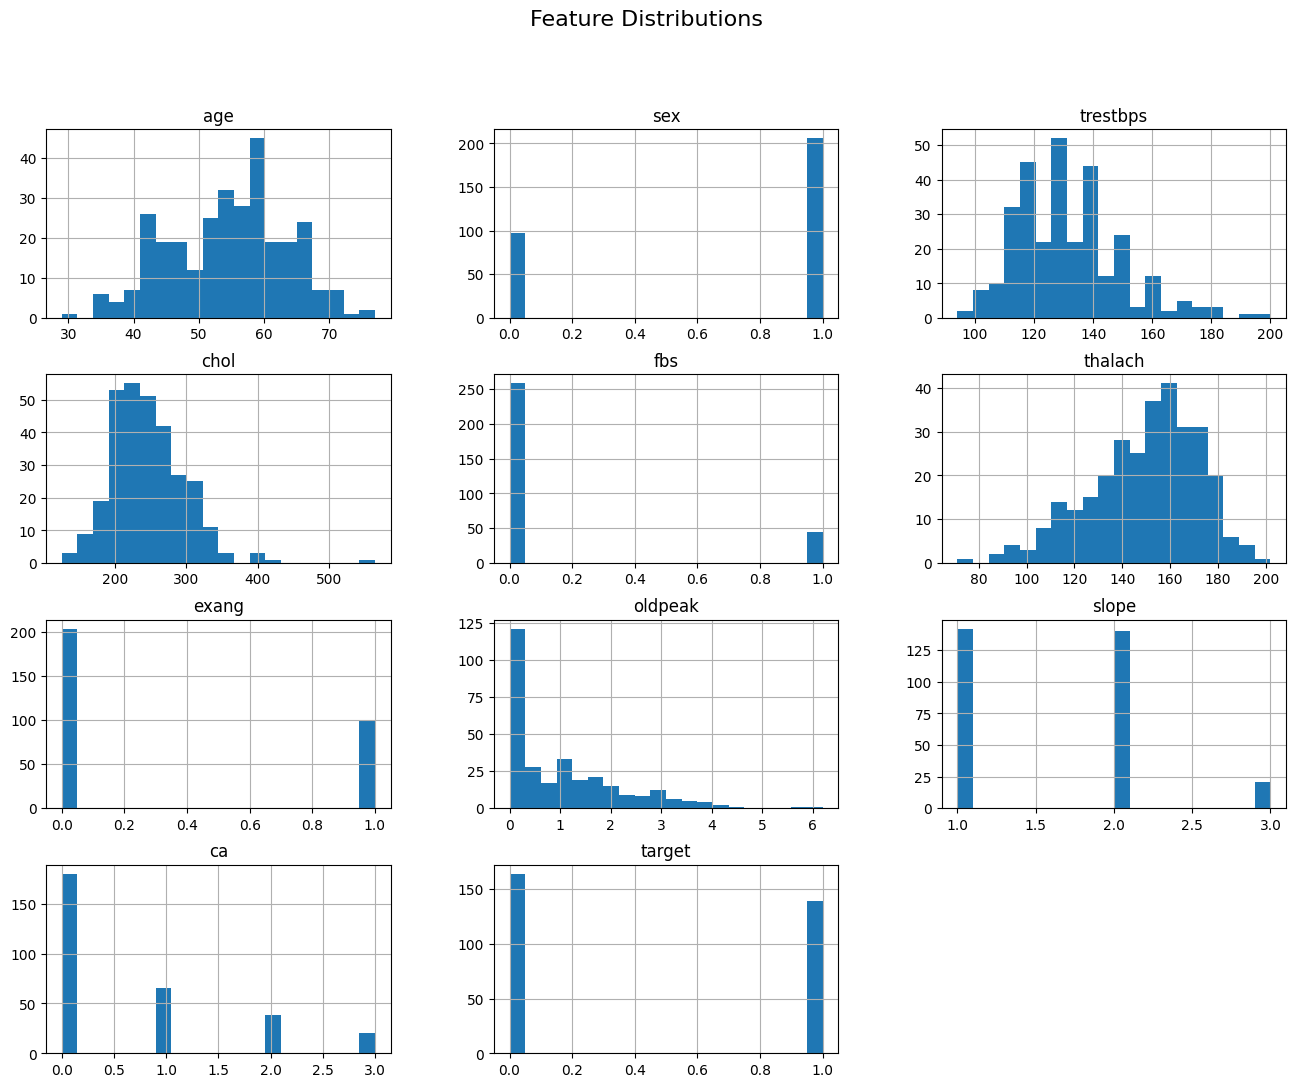

In [114]:
df.hist(figsize=(16, 12), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

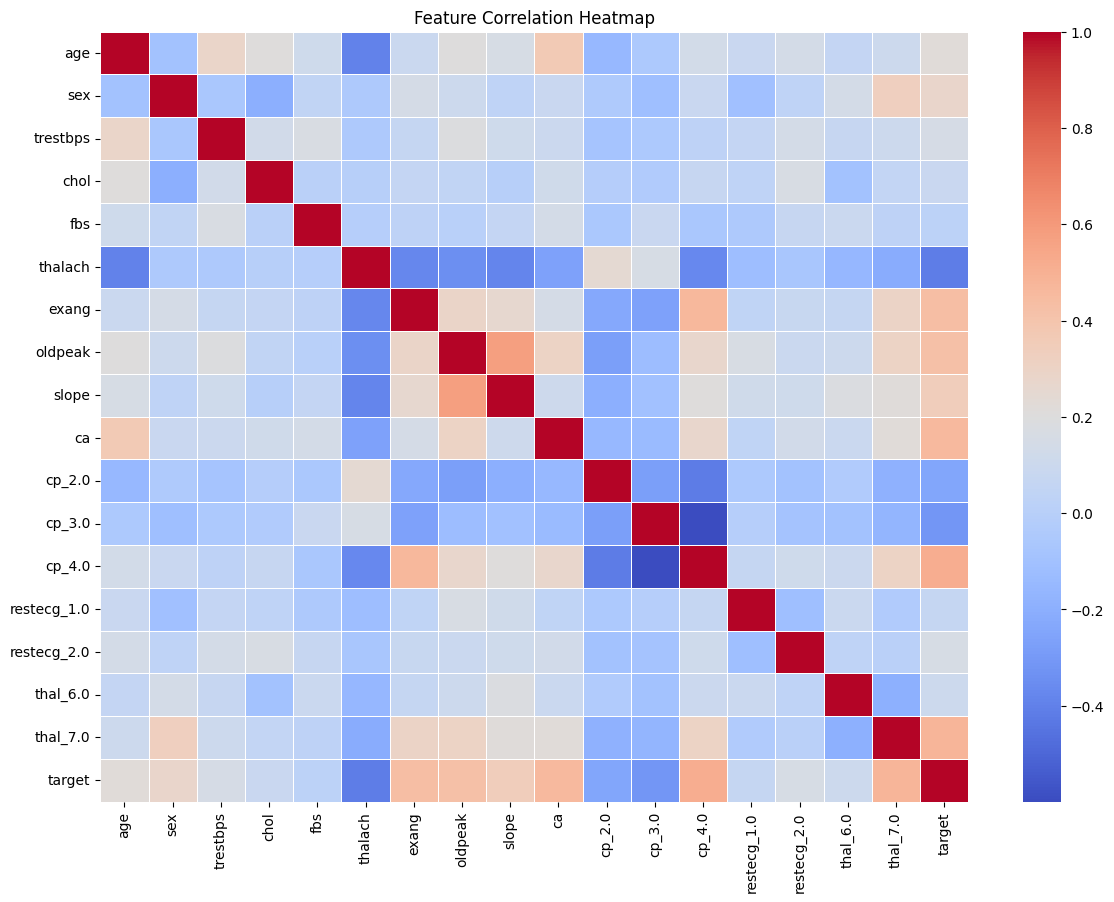

In [115]:
# Convert category & bool to numeric for correlation
df_corr = df.copy()
df_corr[df_corr.select_dtypes("bool").columns] = df_corr.select_dtypes("bool").astype(int)

# Correlation
corr = df_corr.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=False,
    linewidths=0.5
)

plt.title("Feature Correlation Heatmap")
plt.show()

In [116]:
target_corr = (
    df_corr.corr()["target"]
    .drop("target")
    .sort_values(ascending=False)
)

target_corr

cp_4.0         0.516459
thal_7.0       0.480582
ca             0.460033
exang          0.431894
oldpeak        0.424510
slope          0.339213
sex            0.276816
age            0.223120
restecg_2.0    0.160400
trestbps       0.150825
thal_6.0       0.104864
chol           0.085164
restecg_1.0    0.067605
fbs            0.025264
cp_2.0        -0.248683
cp_3.0        -0.315141
thalach       -0.417167
Name: target, dtype: float64

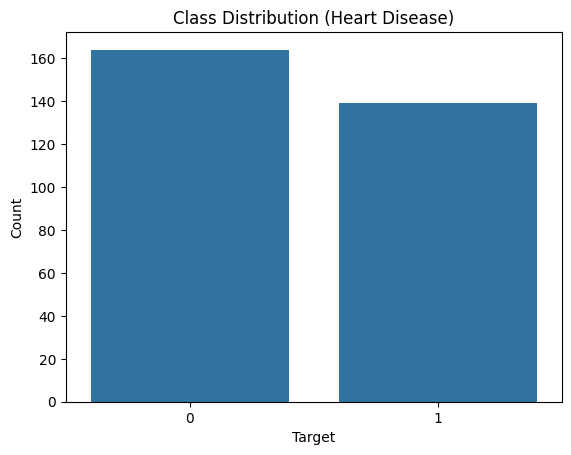

In [117]:
sns.countplot(x="target", data=df)
plt.title("Class Distribution (Heart Disease)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


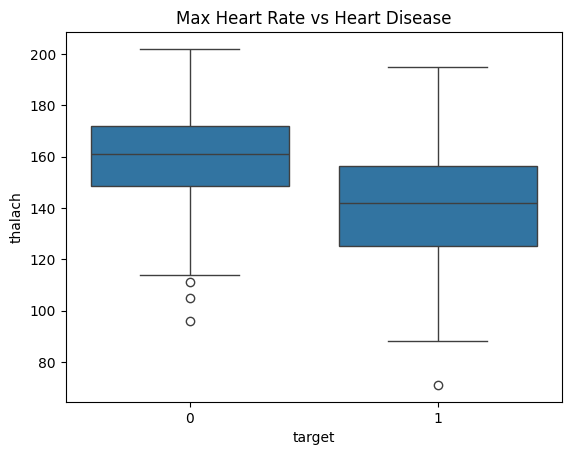

In [118]:
sns.boxplot(x="target", y="thalach", data=df)
plt.title("Max Heart Rate vs Heart Disease")
plt.show()


In [119]:
df.shape

(303, 18)

In [60]:
PROCESSED_PATH.mkdir(parents=True, exist_ok=True)
output_file = PROCESSED_PATH / f"cleaned_v0.csv"
df.to_csv(output_file, index=False)